# Damped Sine Wave With Noise
Sometimes, curve fitting requires having a function that matches the underlying physics.  In this case, the program is searching for parameters of a known function.

The scipy.optimize library has a fitting function that will adjust the parameters on an arbitrary function (Which you will write) to get the best fit.

Start by importing several useful libraries

In [2]:
import numpy as np # get array and matrix functions from here
import scipy.optimize as opt # will get curve_fit from here
import math  # get some engineering functions
import matplotlib.pyplot as plt # for plotting
import pandas as pd # for reading signal csv file

Define a function for a damped sin wave. This is like the one from the first problem.

The arguments are a set of input x values (Like a list or array)
A vector of parameters

Function returns a set of results


In [3]:
# first p is the sin multiplier
# second p is the sin phase
# third p is the exponent weight
# fourth is an overall gain factor
#def fds(xin,sm,sp,ew,gain):
    #return [ gain*math.sin(sm*x+sp)*math.exp(-ew*x) for x in xin]



In [4]:
def frs(xin, a, b, c, d):
    return [((a/(b + x))*math.sin(((2*math.pi)/c)*x)+d) for x in xin]

Make a quick plot to test things out...


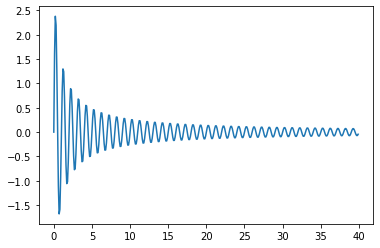

In [5]:
xv = [x/10 for x in range(400)] # create x values
#yv = fds(xv,4,1,0.1,1) # just dummy values for now
yv = frs(xv, 3, 1, 1, 0) # just dummy values for now
plt.plot(xv,yv)
plt.show()

Now, try a curve fit to this data... See what parameters the software finds.


In [6]:
popt,pcov = opt.curve_fit(frs,xv,yv)
print(popt)

[ 3.00000000e+00  9.99999999e-01  1.00000000e+00 -1.93345455e-10]


The Y data was generated with 4,1,0.1,1  The program didn't find that. But if you look closely, there are two negatives.  Plot both, and see what it looks like

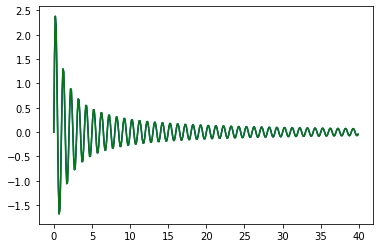

In [7]:
plt.plot(xv,yv,'b')
plt.plot(xv,frs(xv,*popt),'g')
plt.show()

The two curves are right on top of each other. The negatives cancel in the end, and the phase is 2*pi - 1, and is mathematicly the same phase

## noise
The power of curve fitting isn't fitting exact functions, but fitting functions with noise.

Noise tends to hide the signal. In theory, the average of noise is zero, and this means our desired curve is in the middle of the noise somewhere.


Now it is possible to create random numbers, and add them to the data. This will simulate noise for the curve fitting examples.  Repeat the above by adding some noise to the y values before the curve fitting.

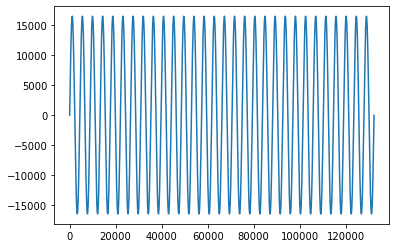

In [34]:
columns = ["X", "Y"]
df = pd.read_csv("wav_10Hz_Output_mono.csv", usecols=columns)
#print("Contents in csv file:\n", df)
plt.plot(df.X, df.Y)
plt.show()
#df = pd.read_csv()

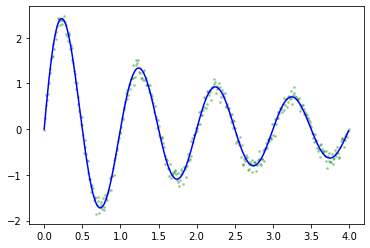

In [25]:
xv = [x/100 for x in range(400)] # create x values
#xv = df.X
yp = frs(xv, 3, 1, 1, 0) # perfect y values
#yp = df.Y
yv = [ y+random.gauss(0,0.1) for y in yp] # values with noise
plt.plot(xv,yp,'b')
plt.scatter(xv,yv,alpha=0.3,s=3,c='green')
plt.show()

Now, perform the curve fitting and look at the results compared to the perfect curve. (Without any noise)

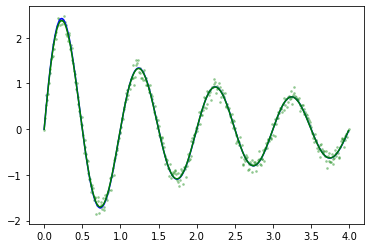

In [29]:
#print(yp)
popt,pcov = opt.curve_fit(frs,xv,yv)
plt.plot(xv,yp,'b')
plt.plot(xv,frs(xv,*popt),'g')
plt.scatter(xv,yv,alpha=0.3,s=3,c='green')
plt.show()

The noise has confused the fit a little, but not too much It helps to plot the error between the perfect curve, and the fit curve. 